<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/HES3_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

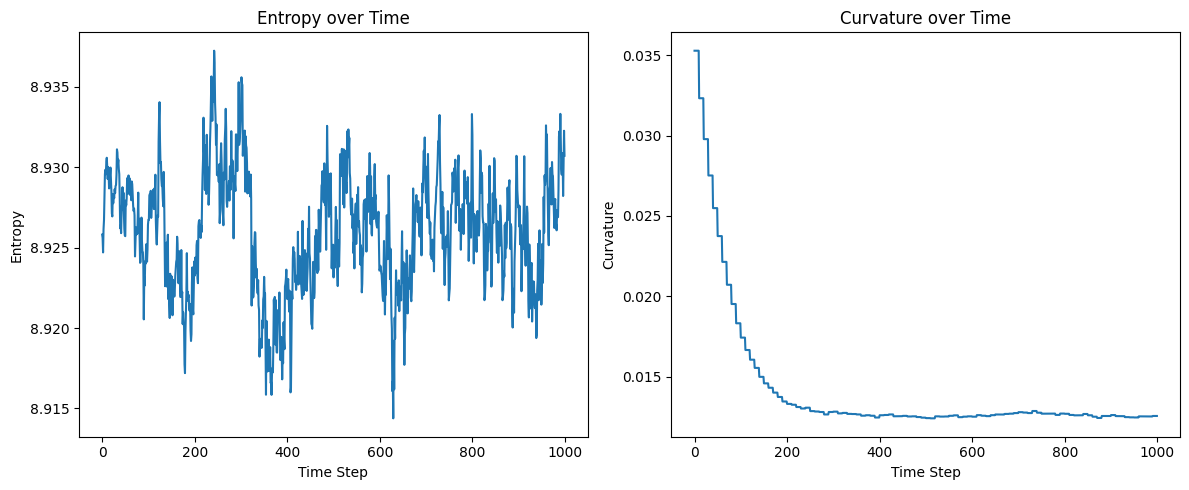

In [ ]:
# 🌀 Act IV: Delayed Tensor Coupling Protocol
# Author: Chris & the Doctor
# Purpose: Non-invasive simulation of HES 33.0 with delayed field coupling and stochastic integration

import numpy as np
import matplotlib.pyplot as plt

# 🎲 Parameters
N = 100  # Grid size
T_max = 1000  # Total time steps
dt = 0.01  # Time step size
delay_interval = 10  # Delay between M updates
lambda_smooth = 0.1  # Smoothing factor for contraction term
noise_strength = 0.05  # Stochastic noise amplitude

# 🧬 Initialize fields
s = np.random.randn(N, N) * 0.01  # Initial state field
M = np.zeros((N, N))  # Emergent structure field
entropy_log = []
curvature_log = []

# 🧠 Helper functions
def evolve_s_stochastically(s, noise_strength, dt):
    # Langevin-like update with bounded noise
    noise = np.random.normal(0, noise_strength, s.shape)
    ds = -s + noise  # Toy dynamics: decay + noise
    return s + ds * dt

def update_M_from_s(s):
    # Delayed coupling: read s and compute M
    return np.tanh(s)  # Placeholder: nonlinear projection

def compute_entropy(s):
    # Shannon entropy proxy
    p = np.abs(s) / np.sum(np.abs(s))
    p = np.clip(p, 1e-12, 1.0)
    return -np.sum(p * np.log(p))

def compute_curvature(M):
    # Laplacian-based curvature proxy
    laplacian = (
        -4 * M +
        np.roll(M, 1, axis=0) + np.roll(M, -1, axis=0) +
        np.roll(M, 1, axis=1) + np.roll(M, -1, axis=1)
    )
    return np.mean(np.abs(laplacian))

# 🔁 Simulation loop
for t in range(T_max):
    s = evolve_s_stochastically(s, noise_strength, dt)

    if t % delay_interval == 0:
        M = update_M_from_s(s)

    # 🪞 Indirect probing
    entropy_log.append(compute_entropy(s))
    curvature_log.append(compute_curvature(M))

# 📊 Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(entropy_log)
plt.title("Entropy over Time")
plt.xlabel("Time Step")
plt.ylabel("Entropy")

plt.subplot(1, 2, 2)
plt.plot(curvature_log)
plt.title("Curvature over Time")
plt.xlabel("Time Step")
plt.ylabel("Curvature")

plt.tight_layout()
plt.show()
